<a href="https://colab.research.google.com/github/Svsampath/Earthquake-Prediction-Model-Using-Python/blob/main/EARTHQUAKE_PREDICTION_MODEL_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
from google.colab import data_table

# Upload the CSV file to your Colab environment
uploaded = files.upload()

# Enable the data table formatter for better display of DataFrames
data_table.enable_dataframe_formatter()

# Read the uploaded CSV file
import io
df = pd.read_csv(io.BytesIO(uploaded['database.csv']))

# Print the first 5 rows of the DataFrame
display(df)


Saving database.csv to database.csv


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
df.info
head=df.head()
print(head)

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y = df['Magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 1.00, MSE: 0.00


In [ ]:
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [11. 14.]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['Magnitude'], y=y_test, color='violet', scatter_kws={'s': 10})
plt.legend(labels=['Latitude', 'Longitude', 'Depth', 'Magnitude'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

NameError: ignored

In [ ]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -0.026802812913289342


In [ ]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -0.03, MSE: 0.18


In [ ]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [5.92966217 5.92981968]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude','Latitude']][:subset_size].values
classes = df['Magnitude Type'][:subset_size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Assuming you have already loaded your data into the 'df' DataFrame

# Subset size for demonstration
subset_size = 500

# Modify the column names based on the dataset
features = df[['Magnitude', 'Latitude']][:subset_size].values
classes = df['Magnitude Type'][:subset_size].values

# Create SVMs with RBF kernels
svm1 = SVC(kernel='rbf')
svm2 = SVC(kernel='rbf')
svm3 = SVC(kernel='rbf')

# Fit each SVM
svm1.fit(features, (classes == 'ML').astype(int))
svm2.fit(features, (classes == 'Mx').astype(int))
svm3.fit(features, (classes == 'Md').astype(int))

# Create a mesh grid
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot the decision boundaries
Z1 = svm1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = svm2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z3 = svm3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.3)
plt.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.5)

# Scatter plot with different colors for different classes
for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s=20, c='y', label='ML')
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s=20, c='b', label='Mx')
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s=20, c='g', label='Md')
    else:
        plt.scatter(features[i][0], features[i][1], s=20, c='k', label='Other')

plt.xlabel('Magnitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Mean Squared Error:  1.910768737989737e-06
R^2 Score:  0.9999892461321305


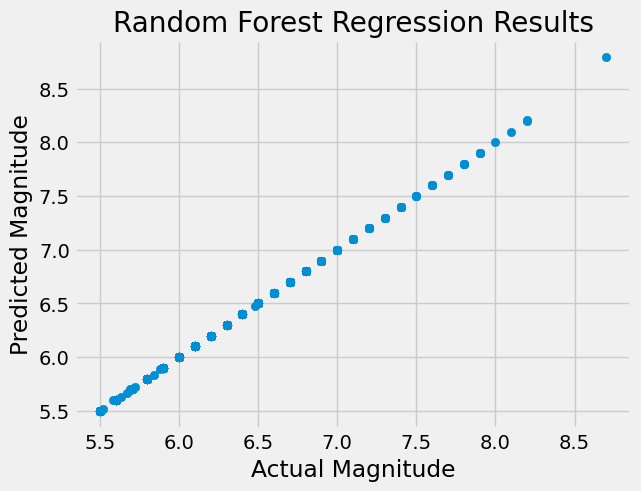

In [ ]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

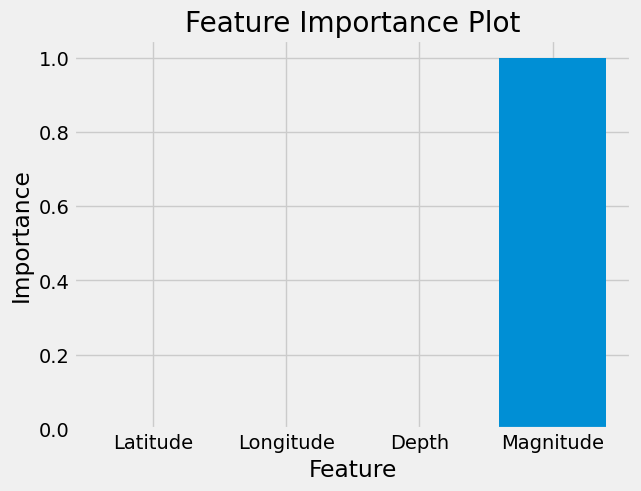

In [ ]:
importances =
features = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

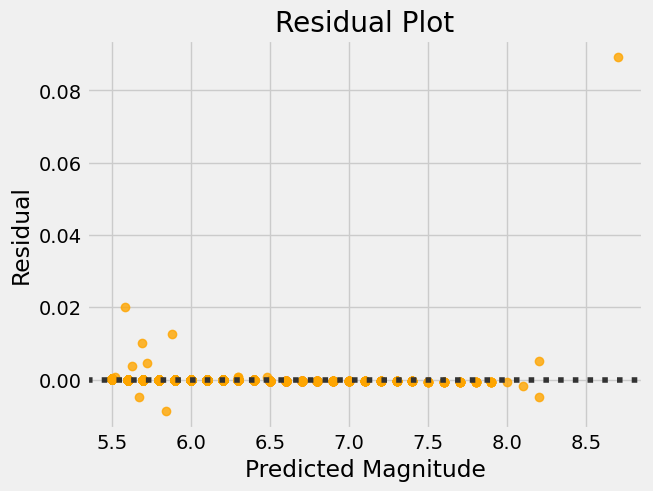

In [ ]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

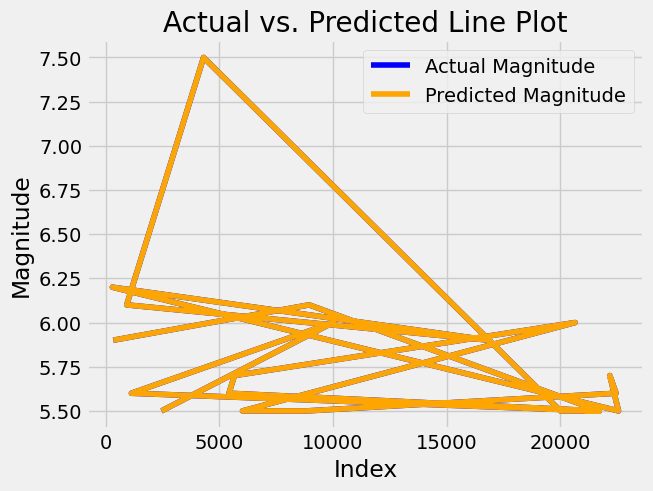

In [ ]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

In [ ]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.000000,1.000000
1,SVM,0.182444,-0.026803
2,Random Forest,0.000002,0.999989


In [ ]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

,Model name,mse,R^2
0,Linear regression,0.0,1.0


In [ ]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
0,Linear regression,0.0,1.0
